In [2]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
ls

DIAS Attributes - Values 2017.xlsx
DIAS Information Levels - Attributes 2017.xlsx
Udacity_AZDIAS_052018.csv
Udacity_AZDIAS_052018_cleaned3.csv
Udacity_CUSTOMERS_052018.csv
Udacity_MAILOUT_052018_TEST.csv
Udacity_MAILOUT_052018_TRAIN.csv
attributes_formated.txt
attributes_formated.xlsx
attributes_key_value.ipynb
attributes_unknowns_label.txt
azdias_scaled.p
keys_with_info.txt


In [3]:
"""
Preparing key:value pair to track the unknowns in the Azdias data set
"""
def to_int(labels):
    return [int(l) for l in labels]
    
fin = open("attributes_unknowns_label.txt","r")
attributes_unk_label = {}
for line in fin:
    line = line.rstrip()
    attribute = line.split()[0]
    if "no transaction" in line:
        #print(line.rstrip())
        label = line.split("no")[0].split()[-1]
        #print(attribute, label)
        attributes_unk_label[attribute] = [int(label)]
    else:
        try:
            label = line.split("unknown")[0].split('"')[-2].split(',')
            #print(attribute, label)
            attributes_unk_label[attribute] = to_int(label)
        except IndexError:
            #print(line)
            label = line.split("unknown")[0].split()[-1]
            #print(attribute, label)
            attributes_unk_label[attribute] = [int(label)]
fin.close()

In [4]:
len(attributes_unk_label)

289

In [6]:
attributes_unk_label

{'AGER_TYP': [-1],
 'ALTERSKATEGORIE_GROB': [-1, 0],
 'ALTER_HH': [0],
 'ANREDE_KZ': [-1, 0],
 'BALLRAUM': [-1],
 'BIP_FLAG': [-1],
 'CAMEO_DEUG_2015': [-1],
 'CAMEO_DEUINTL_2015': [-1],
 'CJT_GESAMTTYP': [0],
 'D19_BANKEN_ANZ_12': [0],
 'D19_BANKEN_ANZ_24': [0],
 'D19_BANKEN_DATUM': [10],
 'D19_BANKEN_DIREKT_RZ': [0],
 'D19_BANKEN_GROSS_RZ': [0],
 'D19_BANKEN_LOKAL_RZ': [0],
 'D19_BANKEN_OFFLINE_DATUM': [10],
 'D19_BANKEN_ONLINE_DATUM': [10],
 'D19_BANKEN_REST_RZ': [0],
 'D19_BEKLEIDUNG_GEH_RZ': [0],
 'D19_BEKLEIDUNG_REST_RZ': [0],
 'D19_BILDUNG_RZ': [0],
 'D19_BIO_OEKO_RZ': [0],
 'D19_BUCH_RZ': [0],
 'D19_DIGIT_SERV_RZ': [0],
 'D19_DROGERIEARTIKEL_RZ': [0],
 'D19_ENERGIE_RZ': [0],
 'D19_FREIZEIT_RZ': [0],
 'D19_GARTEN_RZ': [0],
 'D19_GESAMT_ANZ_12': [0],
 'D19_GESAMT_ANZ_24': [0],
 'D19_GESAMT_DATUM': [10],
 'D19_GESAMT_OFFLINE_DATUM': [10],
 'D19_GESAMT_ONLINE_DATUM': [10],
 'D19_HANDWERK_RZ': [0],
 'D19_HAUS_DEKO_RZ': [0],
 'D19_KINDERARTIKEL_RZ': [0],
 'D19_KK_KUNDENTYP': [-1],
 '

In [39]:
azdias_df = pd.read_csv("Udacity_AZDIAS_052018.csv", sep=";")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
len(azdias_df)

891221

In [41]:
# loading keys whose discription is provided
known_keys = []
fin=open("keys_with_info.txt","r")
for line in fin:
    try:
        token = line.rstrip().split()
        known_keys.append(token[0])
    except IndexError:
        continue
fin.close()
print(len(known_keys))
#print(known_keys)

314


In [42]:
unknown_keys=set(azdias_df.columns)-set(known_keys)
print(len(unknown_keys))
#print(sorted(unknown_keys))

94


In [44]:
## Lets swap all the unknown labels with np.nan 
for c in attributes_unk_label:
    if not c in azdias_df.columns:  # the information on the key is not provided/unknown key
        continue
    try:
        if len(attributes_unk_label[c])>1:
            azdias_df[c] = np.where((azdias_df[c] == attributes_unk_label[c][0]), np.nan, azdias_df[c])
            azdias_df[c] = np.where((azdias_df[c] == attributes_unk_label[c][1]), np.nan, azdias_df[c])
        else:
            azdias_df[c] = np.where((azdias_df[c] == attributes_unk_label[c][0]), np.nan, azdias_df[c])
    except TypeError:
        print(c)
        azdias_df[c] = np.where((azdias_df[c] == attributes_unk_label[c][0]) , np.nan, azdias_df[c])

In [45]:
print("the number of columns with known description =",len(azdias_df.columns) - len(unknown_keys))

the number of columns with known description = 272


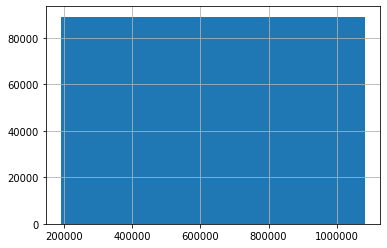

In [46]:
azdias_df['LNR'].hist()

In [95]:
print("shape before dropping", azdias_df.shape)

shape before dropping (891221, 366)


In [98]:
#Lets drop columns with more than 30% NaNs
columns_nan_count = azdias_df.isna().sum()
columns_to_drop = [azdias_df.columns[i] for i in range(len(columns_nan_count)) if columns_nan_count[i]/len(azdias_df) >= 0.3]
azdias_df_dropped = azdias_df.drop(columns_to_drop, axis=1)
print("shape after dropping", azdias_df_dropped.shape)

shape after dropping (891221, 334)


In [97]:
azdias_df.head(n=10)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0
5,910244,3.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,5.0,...,2.0,10.0,7.0,4.0,6.0,9.0,7.0,4.0,2.0,1.0
6,910248,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,2.0,7.0,10.0,10.0,3.0,9.0,5.0,4.0,2.0,2.0
7,910261,NaN,1.0,14.0,NaN,NaN,NaN,NaN,14.0,6.0,...,2.0,10.0,12.0,9.0,5.0,9.0,1.0,1.0,1.0,1.0
8,645145,NaN,9.0,16.0,NaN,NaN,NaN,NaN,16.0,2.0,...,4.0,8.0,11.0,8.0,5.0,8.0,1.0,6.0,1.0,3.0
9,645153,NaN,5.0,17.0,NaN,NaN,NaN,NaN,17.0,9.0,...,4.0,1.0,1.0,1.0,4.0,3.0,7.0,4.0,2.0,3.0


In [126]:
azdias_df_dropped.head(n=10)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,...,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,11.0,0.0,2.0,0.0,6.0,8A,8,5.0,NaN,NaN,...,6.0,1.0,3.0,2.0,3.0,9.0,4.0,5.0,2.0,1.0
2,10.0,0.0,1.0,0.0,2.0,4C,4,3.0,0.0,0.0,...,3.0,4.0,2.0,1.0,3.0,9.0,2.0,5.0,2.0,3.0
3,1.0,0.0,0.0,0.0,4.0,2A,2,2.0,0.0,0.0,...,4.0,4.0,1.0,1.0,NaN,9.0,7.0,3.0,2.0,4.0
4,3.0,0.0,4.0,0.0,2.0,6B,6,5.0,10.0,10.0,...,2.0,7.0,2.0,2.0,2.0,9.0,3.0,4.0,1.0,3.0
5,5.0,0.0,1.0,0.0,6.0,8C,8,2.0,0.0,10.0,...,6.0,2.0,0.0,2.0,6.0,9.0,7.0,4.0,2.0,1.0
6,4.0,0.0,1.0,0.0,6.0,4A,4,5.0,0.0,0.0,...,7.0,2.0,1.0,1.0,3.0,9.0,5.0,4.0,2.0,2.0
7,6.0,0.0,1.0,0.0,2.0,2D,2,3.0,0.0,0.0,...,5.0,6.0,0.0,1.0,5.0,9.0,1.0,1.0,1.0,1.0
8,2.0,1.0,1.0,0.0,3.0,1A,1,3.0,NaN,NaN,...,4.0,5.0,3.0,2.0,5.0,8.0,1.0,6.0,1.0,3.0
9,9.0,0.0,1.0,0.0,6.0,1E,1,4.0,0.0,10.0,...,3.0,2.0,3.0,2.0,4.0,3.0,7.0,4.0,2.0,3.0


In [122]:
# lets also drop columns for which we do not know the descriptions
for c in unknown_keys:
    if c in azdias_df_dropped.columns:
        azdias_df_dropped = azdias_df_dropped.drop(c, axis=1)

print("shape after removing columns without description", azdias_df_dropped.shape)

shape after removing columns without description (891221, 246)


In [127]:
# Columns where categorical features could use one hot encoding
azdias_df_dropped.columns[np.where(azdias_df_dropped.dtypes==object)]

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'OST_WEST_KZ'], dtype='object')

In [155]:
# Finding categories of CAMEO_DEU_2015
CAMEO_DEU_2015_vals = []
for c in azdias_df_dropped['CAMEO_DEU_2015']:
    if c not in CAMEO_DEU_2015_vals:
        CAMEO_DEU_2015_vals.append(c)
print(CAMEO_DEU_2015_vals)
print(len(CAMEO_DEU_2015_vals))

[nan, '8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D', '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F', '1C', 'XX']
46


In [225]:
#Converting the 'XX' to NaN
azdias_df_dropped['CAMEO_DEU_2015'] = np.where((azdias_df_dropped['CAMEO_DEU_2015'] == 'XX'), np.nan, azdias_df_dropped['CAMEO_DEU_2015'])
azdias_df_dropped['CAMEO_DEU_2015'][azdias_df_dropped['CAMEO_DEU_2015']=='XX']

Series([], Name: CAMEO_DEU_2015, dtype: object)

In [230]:
nc1 = azdias_df_dropped['CAMEO_DEU_2015'].isna().sum()
print(nc1)
print("%nan", nc1*100/len(azdias_df_dropped['CAMEO_DEU_2015']))

99352
%nan 11.147852216229195


In [162]:
# Finding categories of CAMEO_DEUG_2015
CAMEO_DEUG_2015_vals = []
for i in range(len(azdias_df_dropped['CAMEO_DEUG_2015'])):
    c = azdias_df_dropped['CAMEO_DEUG_2015'][i]
    try:
        if str(int(c)) not in CAMEO_DEUG_2015_vals:
            CAMEO_DEUG_2015_vals.append(str(int(c)))
    except ValueError:
        if str(c) not in CAMEO_DEUG_2015_vals:
            CAMEO_DEUG_2015_vals.append(str(c))
print(sorted(CAMEO_DEUG_2015_vals))
print(len(CAMEO_DEUG_2015_vals))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


['1', '2', '3', '4', '5', '6', '7', '8', '9', 'X', 'nan']
11


In [213]:
#np.where(azdias_df_dropped['CAMEO_DEUG_2015']=='X')

# CAMEO_DEUG_2015_nans=[]
# for i in range(len(azdias_df_dropped['CAMEO_DEUG_2015'])):
#     try:
#         if np.isnan(azdias_df_dropped['CAMEO_DEUG_2015'][i]):
#             CAMEO_DEUG_2015_nans.append(i)
#     except TypeError:
#         continue
# print(CAMEO_DEUG_2015_nans)

In [204]:
#converting 'X' to NaN
azdias_df_dropped['CAMEO_DEUG_2015'] = np.where((azdias_df_dropped['CAMEO_DEUG_2015'] == 'X'), np.nan, azdias_df_dropped['CAMEO_DEUG_2015'])

In [234]:
nc2 = azdias_df_dropped['CAMEO_DEUG_2015'].isna().sum()
print(nc2)
print("%nan", nc2*100/len(azdias_df_dropped['CAMEO_DEUG_2015']))

99352
%nan 11.147852216229195


In [249]:
# Finding categories of OST_WEST_KZ ('O'/'W' were converted to 0/1 respectively)
OST_WEST_KZ_vals = []
for i in range(len(azdias_df_dropped['OST_WEST_KZ'])):
    c = azdias_df_dropped['OST_WEST_KZ'][i]
    try:
        if str(int(c)) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(int(c)))
    except ValueError:
        if str(c) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(c))
print(sorted(OST_WEST_KZ_vals))
print(len(OST_WEST_KZ_vals))

['0', '1', 'nan']
3


In [236]:
nc3 = azdias_df_dropped['OST_WEST_KZ'].isna().sum()
print(nc3)
print("%nan", nc3*100/len(azdias_df_dropped['OST_WEST_KZ']))

93148
%nan 10.451728583594866


In [239]:
azdias_df = None # freeing bit of memory before one hot encoding

In [248]:
# Lets binary encode the 'OST_WEST_KZ' column
azdias_df_dropped['OST_WEST_KZ'] = np.where((azdias_df_dropped['OST_WEST_KZ'] == 'O'), 0, azdias_df_dropped['OST_WEST_KZ'])
azdias_df_dropped['OST_WEST_KZ'] = np.where((azdias_df_dropped['OST_WEST_KZ'] == 'W'), 1, azdias_df_dropped['OST_WEST_KZ'])

In [251]:
# Lets one hot encode CAMEO_DEUG_2015
#pd.get_dummies(azdias_df_dropped['CAMEO_DEUG_2015'], dummy_na=True)
azdias_df_dropped = pd.concat([azdias_df_dropped,pd.get_dummies(azdias_df_dropped['CAMEO_DEUG_2015'], prefix='CAMEO_DEUG_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEUG_2015'],axis=1)

In [253]:
# Lets drop the CAMEO_DEUG_2015_nan column
azdias_df_dropped = azdias_df_dropped.drop('CAMEO_DEUG_2015_nan', axis=1)

In [255]:
for c in azdias_df_dropped.columns:
    if c.startswith('CAMEO_DEUG_2015_'):
        print(c, end=',')

CAMEO_DEUG_2015_1.0,CAMEO_DEUG_2015_2.0,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0,CAMEO_DEUG_2015_9.0,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,

In [269]:
azdias_df_dropped['CAMEO_DEUG_2015_1.0'][0] or azdias_df_dropped['CAMEO_DEUG_2015_1'][0]

0

In [301]:
## Unfortunarely the labels were 1.0,1, 2.0,2, and so on. They are the same, so lets 'or' to combine in one column
azdias_df_dropped_new = pd.concat([azdias_df_dropped, azdias_df_dropped['CAMEO_DEUG_2015_1.0'] | azdias_df_dropped['CAMEO_DEUG_2015_1']], axis=1, names='CAMEO_DEUG_2015_1_All').drop(['CAMEO_DEUG_2015_1', 'CAMEO_DEUG_2015_1.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_1_All'})

In [303]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_2.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_2']], axis=1, names='CAMEO_DEUG_2015_2_All').drop(['CAMEO_DEUG_2015_2', 'CAMEO_DEUG_2015_2.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_2_All'})

In [305]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_3.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_3']], axis=1, names='CAMEO_DEUG_2015_3_All').drop(['CAMEO_DEUG_2015_3', 'CAMEO_DEUG_2015_3.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_3_All'})

In [307]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_4.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_4']], axis=1, names='CAMEO_DEUG_2015_4_All').drop(['CAMEO_DEUG_2015_4', 'CAMEO_DEUG_2015_4.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_4_All'})

In [309]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_5.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_5']], axis=1, names='CAMEO_DEUG_2015_5_All').drop(['CAMEO_DEUG_2015_5', 'CAMEO_DEUG_2015_5.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_5_All'})

In [311]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_6.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_6']], axis=1, names='CAMEO_DEUG_2015_6_All').drop(['CAMEO_DEUG_2015_6', 'CAMEO_DEUG_2015_6.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_6_All'})

In [313]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_7.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_7']], axis=1, names='CAMEO_DEUG_2015_7_All').drop(['CAMEO_DEUG_2015_7', 'CAMEO_DEUG_2015_7.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_7_All'})

In [315]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_8.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_8']], axis=1, names='CAMEO_DEUG_2015_8_All').drop(['CAMEO_DEUG_2015_8', 'CAMEO_DEUG_2015_8.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_8_All'})

In [317]:
azdias_df_dropped_new = pd.concat([azdias_df_dropped_new, azdias_df_dropped_new['CAMEO_DEUG_2015_9.0'] | azdias_df_dropped_new['CAMEO_DEUG_2015_9']], axis=1, names='CAMEO_DEUG_2015_9_All').drop(['CAMEO_DEUG_2015_9', 'CAMEO_DEUG_2015_9.0'], axis=1)
azdias_df_dropped_new = azdias_df_dropped_new.rename(columns={0: 'CAMEO_DEUG_2015_9_All'})

In [318]:
for c in azdias_df_dropped_new.columns:
    if c.startswith('CAMEO_DEUG_2015'):
        print(c)

CAMEO_DEUG_2015_1_All
CAMEO_DEUG_2015_2_All
CAMEO_DEUG_2015_3_All
CAMEO_DEUG_2015_4_All
CAMEO_DEUG_2015_5_All
CAMEO_DEUG_2015_6_All
CAMEO_DEUG_2015_7_All
CAMEO_DEUG_2015_8_All
CAMEO_DEUG_2015_9_All


In [319]:
azdias_df_dropped_new = azdias_df_dropped_new.drop('Unnamed: 0',axis=1) # index column was added that was removed
#azdias_df_dropped_new.to_csv("Udacity_AZDIAS_052018_cleaned1.csv")

In [ ]:
azdias_df_dropped = None

In [3]:
# Lets load the cleaned dataframe if restarted
#azdias_df_dropped_new = pd.read_csv("Udacity_AZDIAS_052018_cleaned1.csv")

In [9]:
# Lets one-hot encode CAMEO_DEU_2015 column
azdias_df_dropped_new2 = pd.concat([azdias_df_dropped_new,pd.get_dummies(azdias_df_dropped_new['CAMEO_DEU_2015'], prefix='CAMEO_DEU_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEU_2015'],axis=1)

0         NaN
1          8A
2          4C
3          2A
4          6B
         ... 
891216     7A
891217     9D
891218     4C
891219     9D
891220     6B
Name: CAMEO_DEU_2015, Length: 891221, dtype: object

In [10]:
#azdias_df_dropped_new3 = azdias_df_dropped_new2.drop(['Unnamed: 0', 'CAMEO_DEU_2015_nan'], axis=1)

In [14]:
#azdias_df_dropped_new3.to_csv("Udacity_AZDIAS_052018_cleaned1.csv")

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_VERSAND_ONLINE_QUOTE_12,...,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,CAMEO_DEU_2015_nan
0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,11.0,0.0,2.0,0.0,6.0,5.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,10.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,4.0,0.0,2.0,5.0,10.0,10.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,15.0,0.0,1.0,0.0,6.0,5.0,0.0,10.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
891217,11.0,0.0,1.0,0.0,7.0,4.0,0.0,0.0,9.0,0.0,...,0,0,0,0,0,0,0,1,0,0
891218,3.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
891219,7.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,9.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
azdias_df_dropped_new = pd.read_csv("Udacity_AZDIAS_052018_cleaned1.csv")

In [4]:
azdias_df_dropped_new.head(n=10)

,Unnamed: 0,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,0.0,2.0,0.0,6.0,5.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,2,10.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,4,3.0,0.0,4.0,0.0,2.0,5.0,10.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,5,5.0,0.0,1.0,0.0,6.0,2.0,0.0,10.0,4.0,...,0,0,0,1,0,0,0,0,0,0
6,6,4.0,0.0,1.0,0.0,6.0,5.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0
7,7,6.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0
8,8,2.0,1.0,1.0,0.0,3.0,3.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,9,9.0,0.0,1.0,0.0,6.0,4.0,0.0,10.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
azdias_df_dropped.columns[np.where(azdias_df_dropped.dtypes==object)]

Index([], dtype='object')

In [18]:
np.where(azdias_df_dropped_new.isna().sum()*100/len(azdias_df_dropped_new) > 28)

(array([ 7,  8,  9, 10]),)

In [26]:
# Lets also drop these columns with >28% NaNs
azdias_df_dropped_new = azdias_df_dropped_new.drop(azdias_df_dropped_new.columns[7:11], axis = 1)

In [19]:
azdias_df_dropped_new.columns[7:11]

Index(['D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12',
       'D19_KONSUMTYP', 'D19_VERSAND_ONLINE_QUOTE_12'],
      dtype='object')

In [20]:
azdias_df_dropped_new['KBA05_MAXBJ']

0         NaN
1         1.0
2         4.0
3         4.0
4         2.0
         ... 
891216    4.0
891217    1.0
891218    2.0
891219    2.0
891220    2.0
Name: KBA05_MAXBJ, Length: 891221, dtype: float64

In [24]:
azdias_df_dropped_new[azdias_df_dropped_new['WOHNLAGE']==0]

,Unnamed: 0,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
138,138,1.0,0.0,2.0,0.0,6.0,NaN,0.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
143,143,5.0,0.0,2.0,0.0,3.0,4.0,0.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
157,157,1.0,0.0,2.0,0.0,2.0,6.0,10.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
269,269,1.0,0.0,4.0,0.0,2.0,3.0,10.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
442,442,2.0,0.0,5.0,0.0,6.0,5.0,0.0,10.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890805,890805,9.0,0.0,2.0,0.0,7.0,4.0,10.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
890855,890855,7.0,0.0,1.0,0.0,2.0,5.0,0.0,10.0,2.0,...,0,1,0,0,0,0,0,0,0,0
891062,891062,4.0,0.0,1.0,0.0,6.0,3.0,0.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
891117,891117,6.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
azdias_df_dropped_new.drop('Unnamed: 0', axis=1)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,5.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,11.0,0.0,2.0,0.0,6.0,5.0,3.0,5.0,5.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,10.0,0.0,1.0,0.0,2.0,3.0,4.0,2.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,4.0,0.0,2.0,5.0,5.0,1.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,15.0,0.0,1.0,0.0,6.0,5.0,3.0,5.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
891217,11.0,0.0,1.0,0.0,7.0,4.0,6.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,0
891218,3.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
891219,7.0,0.0,1.0,0.0,2.0,3.0,6.0,5.0,5.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
#azdias_df_dropped_new.to_csv("Udacity_AZDIAS_052018_cleaned2.csv",index=False, index_label=None)

In [ ]:
#df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [3]:
#azdias_df_dropped_new = pd.read_csv("Udacity_AZDIAS_052018_cleaned2.csv")

In [5]:
# Before imputing
azdias_df_dropped_new.head(n=10)

,Unnamed: 0,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,0.0,2.0,0.0,6.0,5.0,3.0,5.0,5.0,...,0,1,0,0,0,0,0,0,0,0
2,2,10.0,0.0,1.0,0.0,2.0,3.0,4.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,4,3.0,0.0,4.0,0.0,2.0,5.0,5.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
5,5,5.0,0.0,1.0,0.0,6.0,2.0,2.0,2.0,5.0,...,0,0,0,1,0,0,0,0,0,0
6,6,4.0,0.0,1.0,0.0,6.0,5.0,4.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,7,6.0,0.0,1.0,0.0,2.0,3.0,5.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
8,8,2.0,1.0,1.0,0.0,3.0,3.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
9,9,9.0,0.0,1.0,0.0,6.0,4.0,5.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Imputing using the most frequent value in the column
azdias_df_dropped_new = azdias_df_dropped_new.fillna(azdias_df_dropped_new.mode().iloc[0])

In [16]:
# dataframe after imputing
azdias_df_dropped_new.head(n=10)

,Unnamed: 0,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0,1.0,0.0,1.0,0.0,6.0,2.0,6.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,0.0,2.0,0.0,6.0,5.0,3.0,5.0,5.0,...,0,1,0,0,0,0,0,0,0,0
2,2,10.0,0.0,1.0,0.0,2.0,3.0,4.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,4,3.0,0.0,4.0,0.0,2.0,5.0,5.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
5,5,5.0,0.0,1.0,0.0,6.0,2.0,2.0,2.0,5.0,...,0,0,0,1,0,0,0,0,0,0
6,6,4.0,0.0,1.0,0.0,6.0,5.0,4.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,7,6.0,0.0,1.0,0.0,2.0,3.0,5.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
8,8,2.0,1.0,1.0,0.0,3.0,3.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
9,9,9.0,0.0,1.0,0.0,6.0,4.0,5.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Lets save this final clean dataframe for analysis
azdias_df_dropped_new.to_csv("Udacity_AZDIAS_052018_cleaned3.csv")

In [4]:
azdias_df_dropped_new = pd.read_csv("Udacity_AZDIAS_052018_cleaned3.csv")

In [22]:
#Lets scale this data using the minmax scalet of sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
#azdias_scaled_df = scaler.fit_transform(azdias_df_dropped_new)

In [11]:
#azdias_scaled_df.shape

NameError: name 'azdias_scaled_df' is not defined

In [13]:
#azdias_df_dropped_new.shape

(891221, 295)

In [14]:
#azdias_df_dropped_new.head(n=10)

,Unnamed: 0,Unnamed: 0.1,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,EWDICHTE,FINANZ_ANLEGER,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0,0,1.0,0.0,1.0,0.0,6.0,2.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,11.0,0.0,2.0,0.0,6.0,5.0,3.0,5.0,...,0,1,0,0,0,0,0,0,0,0
2,2,2,10.0,0.0,1.0,0.0,2.0,3.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,3.0,0.0,4.0,0.0,2.0,5.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,5,5,5.0,0.0,1.0,0.0,6.0,2.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
6,6,6,4.0,0.0,1.0,0.0,6.0,5.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
7,7,7,6.0,0.0,1.0,0.0,2.0,3.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,8,8,2.0,1.0,1.0,0.0,3.0,3.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
9,9,9,9.0,0.0,1.0,0.0,6.0,4.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# saving scaled dataframe into numpy array
# import pickle
# pickle.dump(azdias_scaled_df[:,2:],open("azdias_scaled.p","wb"))

In [18]:
#azdias_scaled_df[:,2:].shape

(891221, 293)

In [1]:
#azdias_scaled.shape

NameError: name 'azdias_scaled' is not defined

In [7]:
# import pickle
# azdias_scaled = pickle.load(open("azdias_scaled.p", "rb"))

In [6]:
#import numpy as np

In [7]:
#azdias_scaled = np.round(azdias_scaled, 2)

In [8]:
#azdias_scaled.shape

(891221, 293)

In [10]:
#pickle.dump(azdias_scaled[:,2:],open("azdias_scaled.p","wb"))

In [4]:
#azdias_df_dropped_new = pd.read_csv("Udacity_AZDIAS_052018_cleaned3.csv")

In [15]:
#len(azdias_df_dropped_new.columns)

295

In [16]:
#azdias_scaled.shape

(891221, 291)

In [17]:
#azdias_scaled[:,0]

array([0.02, 0.04, 0.02, ..., 0.  , 0.02, 0.02])

In [18]:
#azdias_df_dropped_new.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       'ANZ_PERSONEN', 'ANZ_TITEL', 'BALLRAUM', 'CJT_GESAMTTYP', 'EWDICHTE',
       'FINANZ_ANLEGER',
       ...
       'CAMEO_DEU_2015_7E', 'CAMEO_DEU_2015_8A', 'CAMEO_DEU_2015_8B',
       'CAMEO_DEU_2015_8C', 'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A',
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E'],
      dtype='object', length=295)

In [20]:
#azdias_df_dropped_new['Unnamed: 0.1']

0              0
1              1
2              2
3              3
4              4
           ...  
891216    891216
891217    891217
891218    891218
891219    891219
891220    891220
Name: Unnamed: 0.1, Length: 891221, dtype: int64

In [25]:
azdias_df_dropped_new[azdias_df_dropped_new.columns] = scaler.fit_transform(azdias_df_dropped_new)

In [31]:
#azdias_df_dropped_new['CJT_GESAMTTYP']

0         0.2
1         0.8
2         0.4
3         0.2
4         0.8
         ... 
891216    0.8
891217    0.6
891218    0.6
891219    0.4
891220    0.0
Name: CJT_GESAMTTYP, Length: 891221, dtype: float64

In [1]:
#azdias_df_dropped_new.columns

In [32]:
azdias_df_dropped_new.to_csv('Udacity_AZDIAS_052018_scaled.csv')